In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np

## Make sure Python 3.7 or above is used
import sys
assert sys.version_info >= (3, 7)

## Make sure Sklearn 1.0.1 or above is used
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Needed for importing the data
from pathlib import Path
import pandas as pd

#for graph creation
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import matplotlib.pyplot as plt
from graphviz import Source
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
from sklearn.datasets import make_moons

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor

# Decision Trees

Decision trees are versatile machine learning algorithms that can perform both classification and regression tasks, and even multioutput tasks. They are powerful algorithms, capable of fitting complex datasets. Decision trees are also the fundamental components of random forests (see Chapter 7), which are among the most powerful machine learning algorithms available today.

- One of the many qualities of decision trees is that they require very little data preparation. In fact, they don’t require feature scaling or centering at all.

## Training and Visualizing a Decision Tree

The following code trains a DecisionTreeClassifier on the iris dataset:

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris,y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

- You can visualize the trained decision tree by first using the export_graphviz() function to output a graph definition file called iris_tree.dot.
- Then you can use graphviz.Source.from_file() to load and display the file in a Jupyter notebook.
- Graphviz is an open source graph visualization software package. It also includes a dot command-line tool to convert .dot files to a variety of formats, such as PDF or PNG.

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

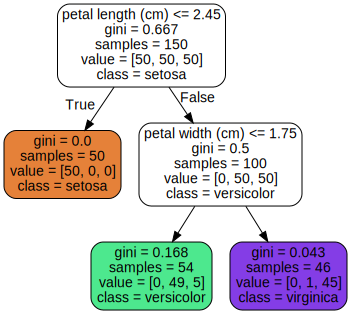

In [4]:
from graphviz import Source

Source.from_file("iris_tree.dot")

#### Making Prediction

Let’s see how the tree represented in Figure above makes predictions. Suppose you find an iris flower and you want to classify it based on its petals. You start at the root node (depth 0, at the top): this node asks whether the flower’s petal length is smaller than 2.45 cm. If it is, then you move down to the root’s left child node (depth 1, left). In this case, it is a <b>leaf node</b> (i.e., it does not have any child nodes), so it does not ask any questions: simply look at the predicted class for that node, and the decision tree predicts that your flower is an Iris setosa (class=setosa).

Now suppose you find another flower, and this time the petal length is greater than 2.45 cm. You again start at the root but now move down to its right <b>child node (depth 1, right)</b>. This is not a leaf node, it’s a <b>split node</b>, so it asks another question: is the petal width smaller than 1.75 cm? If it is, then your flower is most likely an Iris versicolor (depth 2, left). If not, it is likely an Iris virginica (depth 2, right). It’s really that simple.

- A node’s samples attribute counts how many training instances it applies to.
- A node’s value attribute tells you how many training instances of each class this node applies to: for example, the bottom-right node applies to 0 Iris setosa, 1 Iris versicolor, and 45 Iris virginica.
- Finally, a node’s gini attribute measures its Gini impurity: a node is <b>“pure” (gini=0)</b> if all training instances it applies to belong to the same class. For example, since the depth-1 left node applies only to Iris setosa training instances, it is pure and its Gini impurity is 0.

<u>Gini impurity $G_i$ of the $i$-th node</u>:

$$G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2$$

$p_{i,k}$ is the ratio of class $k$ instances among the training instances in the $i$-th node.

- Scikit-Learn uses the CART algorithm, which produces only binary trees, meaning trees where split nodes always have exactly two children (i.e., questions only have yes/no answers). However, other algorithms, such as ID3, can produce decision trees with nodes that have more than two children.



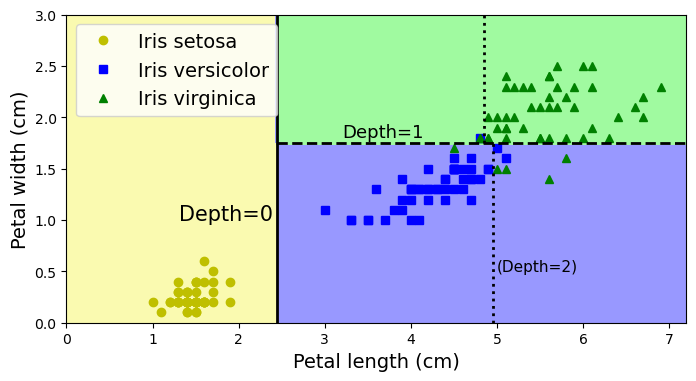

array([ 2.44999999, -2.        ,  1.75      ,  4.95000005, -2.        ,
       -2.        ,  4.85000014, -2.        , -2.        ])

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# extra code – just formatting details
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)


plt.contourf(lengths, widths, y_pred, alpha=1, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

# extra code – this section beautifies and saves Figure 6–2
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()

tree_clf_deeper.tree_.threshold

Above shows this decision tree’s decision boundaries. The thick vertical line represents the decision boundary of the root node (depth 0): petal length = 2.45 cm. Since the lefthand area is pure (only Iris setosa), it cannot be split any further. However, the righthand area is impure, so the depth-1 right node splits it at petal width = 1.75 cm (represented by the dashed line). Since max_depth was set to 2, the decision tree stops right there. If you set max_depth to 3, then the two depth-2 nodes would each add another decision boundary (represented by the two vertical dotted lines).

- The tree structure, including all the information shown in Figures, is available via the classifier’s tree_ attribute. Type help(tree_clf.tree_) for details

### MODEL INTERPRETATION: WHITE BOX VERSUS BLACK BOX

- Decision trees are intuitive, and their decisions are easy to interpret. Such models are often called white box models. In contrast, as you will see, random forests and neural networks are generally considered black box models.
- They make great predictions, and you can easily check the calculations that they performed to make these predictions; nevertheless, it is usually hard to explain in simple terms why the predictions were made. Conversely, decision trees provide nice, simple classification rules that can even be applied manually if need be (e.g., for flower classification).
- The field of interpretable ML aims at creating ML systems that can explain their decisions in a way humans can understand. This is important in many domains—for example, to ensure the system does not make unfair decisions.

## Estimating Class Probabilities

A decision tree can also estimate the probability that an instance belongs to a particular class k. First it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node. For example, suppose you have found a flower whose petals are 5 cm long and 1.5 cm wide. The corresponding leaf node is the depth-2 left node, so the decision tree outputs the following probabilities: 0% for Iris setosa (0/54), 90.7% for Iris versicolor (49/54), and 9.3% for Iris virginica (5/54). And if you ask it to predict the class, it outputs Iris versicolor (class 1) because it has the highest probability. Let’s check this:

In [6]:
print(tree_clf.predict_proba([[5,1.5]]).round(3))
print(tree_clf.predict([[5, 1.5]]).round(3))

[[0.    0.907 0.093]]
[1]


## The CART Training Algorithm

Scikit-Learn uses the Classification and Regression Tree (CART) algorithm to train decision trees (also called “growing” trees).

The algorithm works by first splitting the training set into two subsets using a single feature k and a threshold tk (e.g., “petal length ≤ 2.45 cm”). How does it choose k and tk? It searches for the pair (k, tk) that produces the purest subsets, weighted by their size by minimizing this cost function:

$$J(k,t_k) = \frac{m_\text{left}}{m}G_\text{left}+\frac{m_\text{right}}{m}G_\text{right}\\ G_\text{left/right} \text{ measure the impority of each subset}\\ m_\text{left/right} \text{ measure the number of instances in each subset}$$

Once the CART algorithm has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets, and so on, recursively. It stops recursing once it reaches the maximum depth (defined by the max_depth hyperparameter), or if it cannot find a split that will reduce impurity.

As you can see, the CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the process at each subsequent level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a solution that’s reasonably good but not guaranteed to be optimal. It is possible to find the optimal tree, but it is very computationaly complex, so it better to settle for a "reasonably good" solution, not an optimal one.

### Computational Complexity
Making predictions requires traversing the decision tree from the root to a leaf. Decision trees generally are approximately balanced, so traversing the decision tree requires going through roughly $O(\log_2(m))$ nodes, where $\log_2(m)$ is the binary logarithm of $m$, equal to $\log(m) / \log(2)$. Since each node only requires checking the value of one feature, the overall prediction complexity is $O(\log_2(m))$, independent of the number of features. So predictions are very fast, even when dealing with large training sets.

The training algorithm compares all features (or less if max_features is set) on all samples at each node. Comparing all features on all samples at each node results in a training complexity of $O(n × m \log_2(m))$.

## Gini Impurity or Entropy?

By default, the DecisionTreeClassifier class uses the Gini impurity measure, but you can select the entropy impurity measure instead by setting the criterion hyperparameter to "entropy". In machine learning, entropy is frequently used as an impurity measure: a set’s entropy is zero when it contains instances of only one class. The definition of the entropy of the ith node is:

$$H_i = - \sum_{k=1}^{n} p_{i,k} log_2(pi,k)$$

Most of the time it does not make a big difference: they lead to similar trees. Gini impurity is slightly faster to compute, so it is a good default. However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees.

## Regularizing the Decision Tree

- Decision trees make very few assumptions about the training data (as opposed to linear models, which assume that the data is linear, for example).
- If left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely—indeed, most likely overfitting it.
- Such a model is often called a nonparametric model, not because it does not have any parameters but because the number of parameters is not determined prior to training, so the model structure is free to stick closely to the data.
- In contrast, a parametric model, such as a linear model, has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting).


- To avoid overfitting the training data, you need to restrict the decision tree’s freedom during training. As you know by now, this is called regularization. - <b>max_depth</b>: The regularization hyperparameters depend on the algorithm used, but generally you can at least restrict the maximum depth of the decision tree. In Scikit-Learn, this is controlled by the max_depth hyperparameter. The default value is None, which means unlimited. Reducing max_depth will regularize the model and thus reduce the risk of overfitting.
- <b>max_features</b>: Maximum number of features that are evaluated for splitting at each node
- <b>max_leaf_nodes</b>: Maximum number of leaf nodes
- <b>min_samples_split</b>: Minimum number of samples a node must have before it can be split
- <b>min_samples_leaf</b>: Minimum number of samples a leaf node must have to be created
- <b>min_weight_fraction_leaf</b>: Same as min_samples_leaf but expressed as a fraction of the total number of weighted instances

- Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the model.


- Other algorithms work by first training the decision tree without restrictions, then pruning (deleting) unnecessary nodes. A node whose children are all leaf nodes is considered unnecessary if the purity improvement it provides is not statistically significant. Standard statistical tests, such as the $\chi^2$ test (chi-squared test), are used to estimate the probability that the improvement is purely the result of chance (which is called the null hypothesis). If this probability, called the p-value, is higher than a given threshold (typically 5%, controlled by a hyperparameter), then the node is considered unnecessary and its children are deleted. The pruning continues until all unnecessary nodes have been pruned.

In [7]:
# Let’s test regularization on the moons dataset, introduced in Chapter 5.
# We’ll train one decision tree without regularization, and another with min_samples_leaf=5.

from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

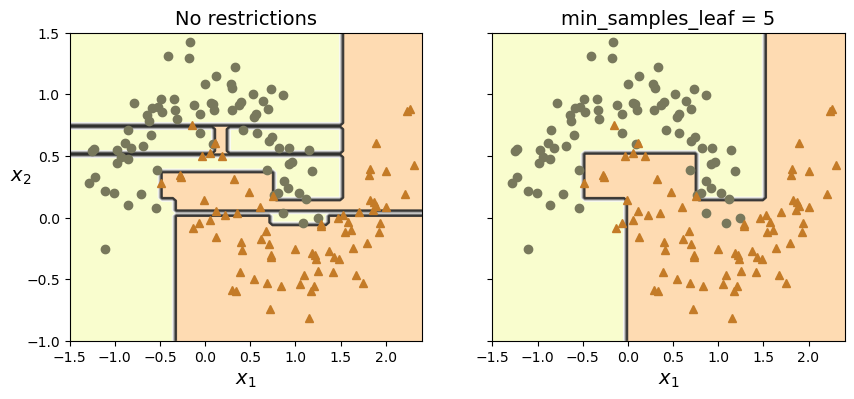

In [8]:
# extra code – this cell generates and saves Figure 6–3

def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
plt.show()

- The unregularized model on the left is clearly overfitting, and the regularized model on the right will probably generalize better. We can verify this by evaluating both trees on a test set generated using a different random seed:



In [9]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2,
                                        random_state=43)
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [10]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

## Regression

Decision trees are also capable of performing regression tasks. Let’s build a regression tree using Scikit-Learn’s DecisionTreeRegressor class, training it on a noisy quadratic dataset with max_depth=2:

In [11]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

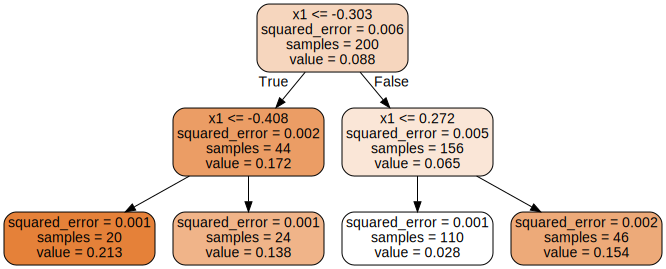

In [12]:
export_graphviz(
    tree_reg,
    out_file=str("regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)
Source.from_file("regression_tree.dot")

- This tree looks very similar to the classification tree you built earlier. The main difference is that instead of predicting a class in each node, it predicts a value. 

- The predicted value for each region is always the average target value of the instances in that region. The algorithm splits each region in a way that makes most training instances as close as possible to that predicted value.

In [13]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

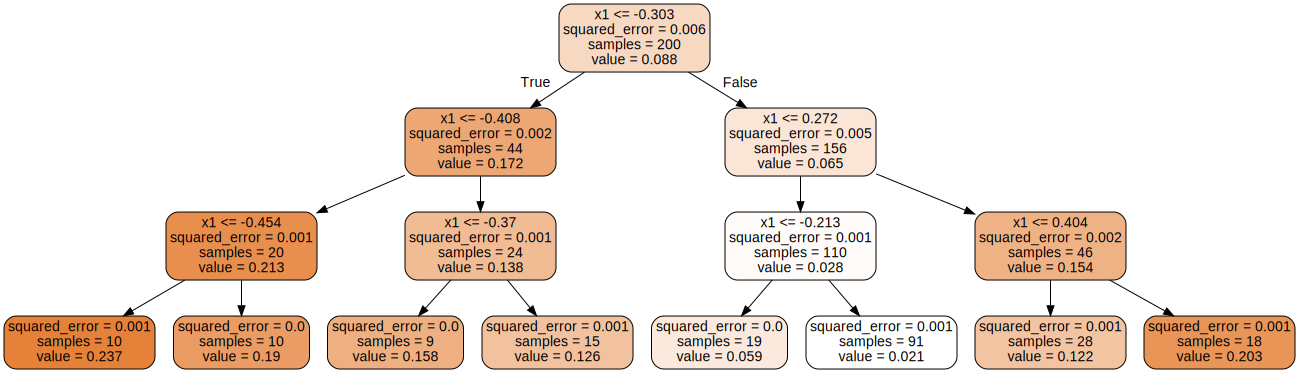

In [14]:
export_graphviz(
    tree_reg2,
    out_file=str("regression_tree2.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)
Source.from_file("regression_tree2.dot")

In [15]:
tree_reg.tree_.threshold

array([-0.30265072, -0.40830374, -2.        , -2.        ,  0.27175756,
       -2.        , -2.        ])

In [16]:
tree_reg2.tree_.threshold

array([-0.30265072, -0.40830374, -0.45416115, -2.        , -2.        ,
       -0.37022041, -2.        , -2.        ,  0.27175756, -0.21270403,
       -2.        , -2.        ,  0.40399227, -2.        , -2.        ])

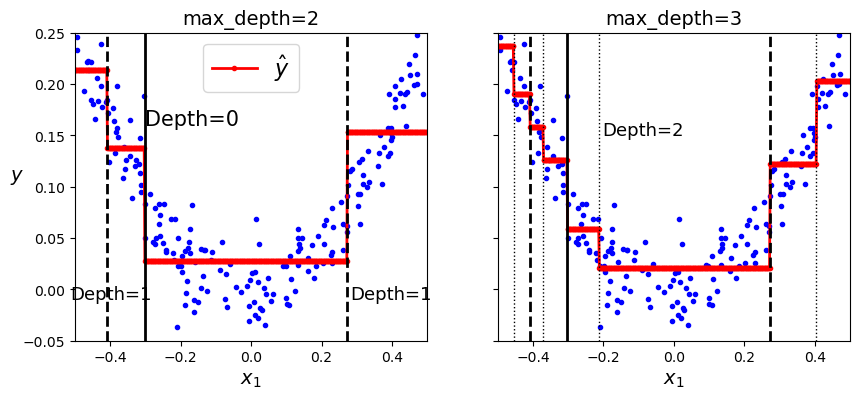

In [17]:
# extra code – this cell generates and saves Figure 6–5

def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")

plt.show()

### CART Training

The CART algorithm works as described earlier, except that instead of trying to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that minimizes the MSE.

$$J(k,t_k) = \frac{m_\text{left}}{m}\text{MSE}_\text{left}+\frac{m_\text{right}}{m}\text{MSE}_\text{right}\\ \text{MSE}_\text{node}=\frac{\sum_{i \in \text{node}}(\hat{y}_\text{node}-y^{(i)})^2}{m_\text{node}}\\ \hat{y}_\text{node} = \frac{\sum_{i \in \text{node}}y^{(i)}}{m_\text{node}}$$

### Regularizing

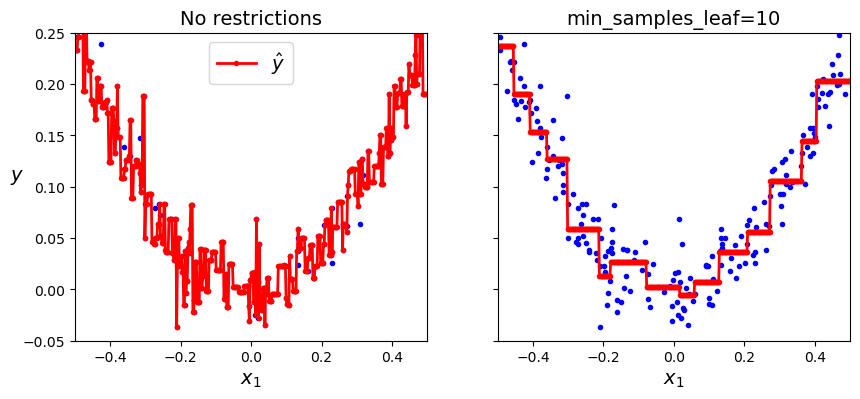

In [18]:
# extra code – this cell generates and saves Figure 6–6

tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")

plt.show()

### Decision Tree Limitations

Decision Trees do have a few limitations.

- <b> Decision Trees Have a High Variance: </b> First, as you may have noticed, decision trees love orthogonal decision boundaries (all splits are perpendicular to an axis), which makes them sensitive to the data’s orientation. One way to limit this problem is to scale the data, then apply a principal component analysis transformation (PCA). 

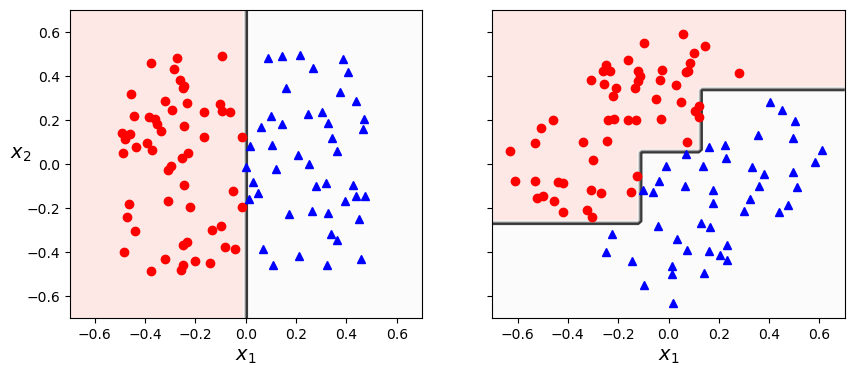

In [19]:
# extra code – this cell generates and saves Figure 6–7
#shows a simple linearly separable dataset: on the left, a decision tree can split it easily, while on the right, after the dataset
# is rotated by 45°, the decision boundary looks unnecessarily convoluted. Although both decision trees fit the training set perfectly,
# it is very likely that the model on the right will not generalize well.

np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[:, 0] > 0).astype(np.int64)

angle = np.pi / 4  # 45 degrees
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
X_rotated_square = X_square.dot(rotation_matrix)

tree_clf_square = DecisionTreeClassifier(random_state=42)
tree_clf_square.fit(X_square, y_square)
tree_clf_rotated_square = DecisionTreeClassifier(random_state=42)
tree_clf_rotated_square.fit(X_rotated_square, y_square)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_square, X_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.sca(axes[1])
plot_decision_boundary(tree_clf_rotated_square, X_rotated_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.ylabel("")

plt.show()

Let’s create a small pipeline that scales the data and rotates it using PCA, then train a DecisionTreeClassifier on that data. Figure 6-8 shows the decision boundaries of that tree: as you can see, the rotation makes it possible to fit the dataset pretty well using only one feature, z1, which is a linear function of the original petal length and width. Here’s the code:

In [20]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

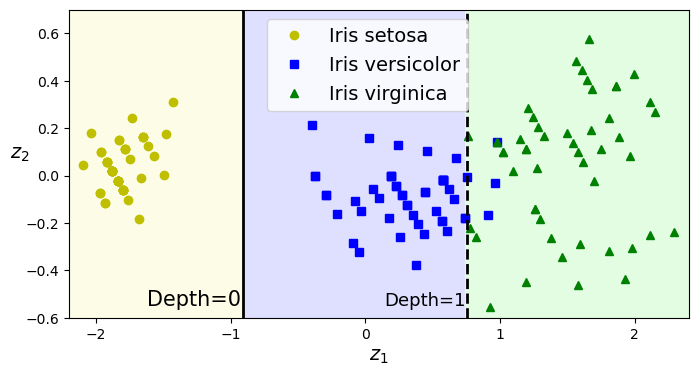

In [21]:
# extra code – this cell generates and saves Figure 6–8

plt.figure(figsize=(8, 4))

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris_rotated[:, 0][y_iris == idx],
             X_iris_rotated[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0",
         horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1",
         horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))

plt.show()

- <b> High Variance: </b> the main issue with decision trees is that they have quite a high variance: small changes to the hyperparameters or to the data may produce very different models. In fact, since the training algorithm used by Scikit-Learn is stochastic—it randomly selects the set of features to evaluate at each node—even retraining the same decision tree on the exact same data may produce a very different model.  Luckily, by averaging predictions over many trees, it’s possible to reduce variance significantly. Such an ensemble of trees is called a random forest, and it’s one of the most powerful types of models available today, as you will see in the next chapter.

In [22]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=40)

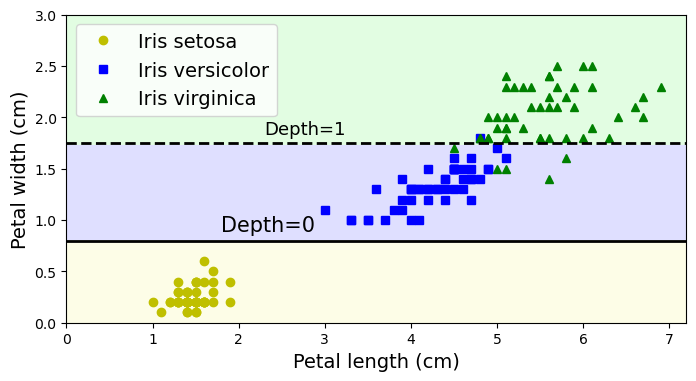

In [23]:
# extra code – this cell generates and saves Figure 6–9

plt.figure(figsize=(8, 4))
y_pred = tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]
plt.plot([0, 7.2], [th0, th0], "k-", linewidth=2)
plt.plot([0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text(1.8, th0 + 0.05, "Depth=0", verticalalignment="bottom", fontsize=15)
plt.text(2.3, th1 + 0.05, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()

## Extra Material – Accessing the tree structure

In [24]:
tree = tree_clf.tree_
tree

In [25]:
tree.node_count
#You can get the total number of nodes in the tree:

5

In [26]:
tree.max_depth


2

In [27]:
tree.max_n_classes

3

In [28]:
tree.n_features

2

In [29]:
tree.n_outputs

1

In [30]:
tree.n_leaves

3

In [31]:
tree.impurity

array([0.66666667, 0.        , 0.5       , 0.16803841, 0.04253308])

The root node is at index 0. The left and right children nodes of node i are tree.children_left[i] and tree.children_right[i]. For example, the children of the root node are:

In [32]:
tree.children_left[0], tree.children_right[0]

(1, 2)

In [33]:
# When the left and right nodes are equal, it means this is a leaf node (and the children node ids are arbitrary):

tree.children_left[3], tree.children_right[3]

(-1, -1)

In [34]:
# So you can get the leaf node ids like this:

is_leaf = (tree.children_left == tree.children_right)
np.arange(tree.node_count)[is_leaf]

array([1, 3, 4])

In [35]:
# Non-leaf nodes are called split nodes. The feature they split is available via the feature array. Values for leaf nodes should be ignored:

tree.feature

array([ 0, -2,  1, -2, -2], dtype=int64)

In [36]:
#corresponding thresholds
tree.threshold

array([ 2.44999999, -2.        ,  1.75      , -2.        , -2.        ])

In [37]:
#And the number of instances per class that reached each node is available too:

tree.value

array([[[50., 50., 50.]],

       [[50.,  0.,  0.]],

       [[ 0., 50., 50.]],

       [[ 0., 49.,  5.]],

       [[ 0.,  1., 45.]]])

In [38]:
tree.n_node_samples

array([150,  50, 100,  54,  46], dtype=int64)

In [39]:
#calculating depth of each node

def compute_depth(tree_clf):
    tree = tree_clf.tree_
    depth = np.zeros(tree.node_count)
    stack = [(0, 0)]
    while stack:
        node, node_depth = stack.pop()
        depth[node] = node_depth
        if tree.children_left[node] != tree.children_right[node]:
            stack.append((tree.children_left[node], node_depth + 1))
            stack.append((tree.children_right[node], node_depth + 1))
    return depth

depth = compute_depth(tree_clf)
depth

array([0., 1., 1., 2., 2.])

In [40]:
#Here's how to get the thresholds of all split nodes at depth 1:
tree_clf.tree_.feature[(depth == 1) & (~is_leaf)]

array([1], dtype=int64)

In [41]:
tree_clf.tree_.threshold[(depth == 1) & (~is_leaf)]

array([1.75])